<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/beoman/%EC%9A%9C%EB%A1%9Cv5_hardhat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%mkdir /content/yolov5_hard_hat/ #폴더 만들기
%cd /content/yolov5_hard_hat/ #폴더 위치 지정

!curl -L "https://app.roboflow.com/ds/RbrolBtkJg?key=qjxJQvu42q" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

[Errno 2] No such file or directory: '/content/yolov5_hard_hat/ #폴더 위치 지정'
/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    523      0  0:00:01  0:00:01 --:--:--   523
100 6235k  100 6235k    0     0  3082k      0  0:00:02  0:00:02 --:--:-- 64.0M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/000008_jpg.rf.CH9yHal6YgWm5LPRCIYm.jpg  
 extracting: test/images/000011_jpg.rf.fnZTYPVy445TLHmB0G73.jpg  
 extracting: test/images/000034_jpg.rf.VnLZzewRv2gsqtMefF2T.jpg  
 extracting: test/images/000047_jpg.rf.AeGSxs6QRNa2c2fi5JSJ.jpg  
 extracting: test/images/000054_jpg.rf.82VJmoQDvJlFv9KsMSM2.jpg  
 extracting: test/images/000073_jpg.rf.3uI6T7nQZZ5nqKdrdtwt.jpg  
 extracting: test/images/000076_jpg.rf.aBfxzL9AOvX7bINUviSO.

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git  #욜로V5 설치

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 12583, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 12583 (delta 76), reused 89 (delta 55), pack-reused 12467
Receiving objects: 100% (12583/12583), 12.81 MiB | 32.80 MiB/s, done.
Resolving deltas: 100% (8675/8675), done.


In [3]:
%cat /content/yolov5_hard_hat/data.yaml #yaml파일 출력

#nc: 라벨 종류 

train: ../train/images
val: ../valid/images

nc: 3
names: ['head', 'helmet', 'person']

In [5]:
# 데이터셋 위치 수정
#파일의 위치, 클래스명 알려주는 설정파일이라 경로 수정
import yaml

with open('/content/yolov5_hard_hat/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.Loader)

print(data)

data['train'] = '/content/yolov5_hard_hat/'
data['test'] = '/content/yolov5_hard_hat/'
data['val'] = '/content/yolov5_hard_hat/'

with open('/content/yolov5_hard_hat/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 3, 'names': ['head', 'helmet', 'person']}
{'train': '/content/yolov5_hard_hat/', 'val': '/content/yolov5_hard_hat/', 'nc': 3, 'names': ['head', 'helmet', 'person'], 'test': '/content/yolov5_hard_hat/'}


In [7]:
%cd /content/yolov5/
 
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
%cd /content/yolov5/

# 욜로v5_m로 학습 
!python train.py --img 416 --batch 16 --epochs 50 --data /content/yolov5_hard_hat/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name mask_yolov5m_results

/content/yolov5
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/content/yolov5_hard_hat/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=mask_yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-143-g63368e7 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.

In [11]:
# test 이미지 확인
%cd /content/yolov5/

from glob import glob 

img_list = glob('/content/yolov5_hard_hat/test/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환

print(len(img_list))


/content/yolov5
10


detect: weights=['/content/yolov5/runs/train/mask_yolov5m_results/weights/best.pt'], source=/content/yolov5_hard_hat/test/images/000084_jpg.rf.cpfN7v4tHipQXh0UHlWx.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-143-g63368e7 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/yolov5_hard_hat/test/images/000084_jpg.rf.cpfN7v4tHipQXh0UHlWx.jpg: 416x416 8 helmets, 18.3ms
Speed: 0.4ms pre-process, 18.3ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp5


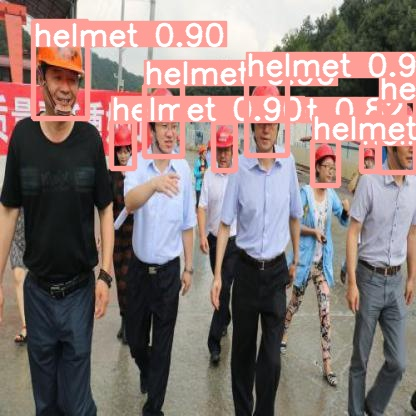

In [16]:
from IPython.display import Image
import os


val_img_path = img_list[1]

weights_path = '/content/yolov5/runs/train/mask_yolov5m_results/weights/best.pt'

!python detect.py --weights "{weights_path}" --img 416 --conf 0.7 --source "{val_img_path}"              #70% 이상이면 성공

detect_img_path = '/content/yolov5/runs/detect/exp5'            # 확인 할려면 exp_num num을 계속 올려줘야함 

Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))